In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score

In [104]:
# подгружаем данные и смотрим на них
data = pd.read_csv('data.csv', index_col=0)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [105]:
#посмотрим на полный список доступных признаков
sorted(data.columns.tolist())

['Unnamed: 32',
 'area_mean',
 'area_se',
 'area_worst',
 'compactness_mean',
 'compactness_se',
 'compactness_worst',
 'concave points_mean',
 'concave points_se',
 'concave points_worst',
 'concavity_mean',
 'concavity_se',
 'concavity_worst',
 'diagnosis',
 'fractal_dimension_mean',
 'fractal_dimension_se',
 'fractal_dimension_worst',
 'perimeter_mean',
 'perimeter_se',
 'perimeter_worst',
 'radius_mean',
 'radius_se',
 'radius_worst',
 'smoothness_mean',
 'smoothness_se',
 'smoothness_worst',
 'symmetry_mean',
 'symmetry_se',
 'symmetry_worst',
 'texture_mean',
 'texture_se',
 'texture_worst']

In [106]:
#сколько их
data.shape

(569, 32)

In [107]:
#какого типа эти данные
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

In [108]:
#посмотрим где много пропусков
np.round(data.isna().sum()[data.isna().sum()>0] / data.shape[0], 2)

Unnamed: 32    1.0
dtype: float64

In [109]:
#приготовим список на удаление пропусков
features_with_na=data.isna().sum()[data.isna().sum()>0] / data.shape[0]
list_to_drop=features_with_na[features_with_na > 0.3].index.tolist()
list_to_drop

['Unnamed: 32']

In [110]:
#Удалим пропуски и посмотрим еще раз
data.drop(list_to_drop, axis=1, inplace=True)
data.dropna().shape[0] / data.shape[0]

1.0

In [111]:
#средняя по датасету
data.mean(numeric_only=True)


radius_mean                 14.127292
texture_mean                19.289649
perimeter_mean              91.969033
area_mean                  654.889104
smoothness_mean              0.096360
compactness_mean             0.104341
concavity_mean               0.088799
concave points_mean          0.048919
symmetry_mean                0.181162
fractal_dimension_mean       0.062798
radius_se                    0.405172
texture_se                   1.216853
perimeter_se                 2.866059
area_se                     40.337079
smoothness_se                0.007041
compactness_se               0.025478
concavity_se                 0.031894
concave points_se            0.011796
symmetry_se                  0.020542
fractal_dimension_se         0.003795
radius_worst                16.269190
texture_worst               25.677223
perimeter_worst            107.261213
area_worst                 880.583128
smoothness_worst             0.132369
compactness_worst            0.254265
concavity_wo

In [112]:
#медиана по датасету
data.median(numeric_only=True)

radius_mean                 13.370000
texture_mean                18.840000
perimeter_mean              86.240000
area_mean                  551.100000
smoothness_mean              0.095870
compactness_mean             0.092630
concavity_mean               0.061540
concave points_mean          0.033500
symmetry_mean                0.179200
fractal_dimension_mean       0.061540
radius_se                    0.324200
texture_se                   1.108000
perimeter_se                 2.287000
area_se                     24.530000
smoothness_se                0.006380
compactness_se               0.020450
concavity_se                 0.025890
concave points_se            0.010930
symmetry_se                  0.018730
fractal_dimension_se         0.003187
radius_worst                14.970000
texture_worst               25.410000
perimeter_worst             97.660000
area_worst                 686.500000
smoothness_worst             0.131300
compactness_worst            0.211900
concavity_wo

In [113]:
#посмотрим какие бывают диагнозы(целевая переменная, единственный обхект)
print(data['diagnosis'].unique())

['M' 'B']


In [114]:
#Заменим признаки на бинарные, так как их всего два
data=data.replace({"M":0,"B":1})
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<AxesSubplot:xlabel='radius_mean', ylabel='Count'>

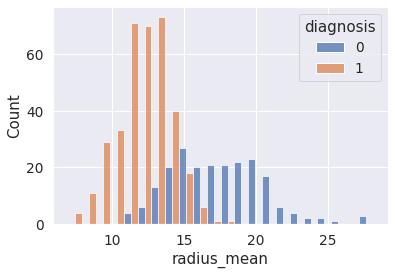

In [115]:
# Построим гистограммы и боксплоты для некоторых признаков
sns.histplot(data=data, x="radius_mean", hue="diagnosis", multiple="dodge")


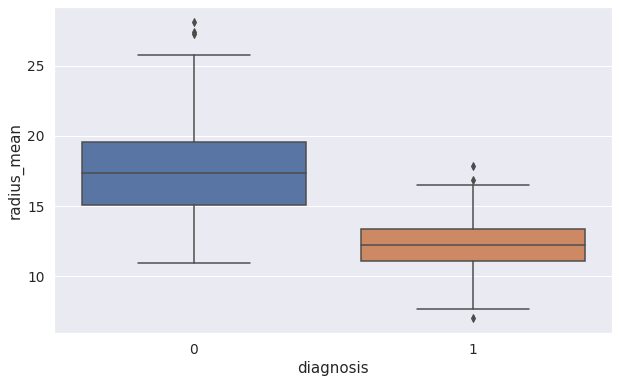

In [116]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='diagnosis', y="radius_mean")
plt.show()

<AxesSubplot:xlabel='perimeter_se', ylabel='Count'>

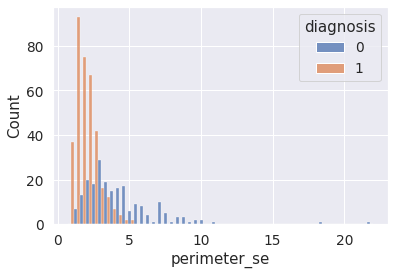

In [117]:
sns.histplot(data=data, x="perimeter_se", hue="diagnosis", multiple="dodge")

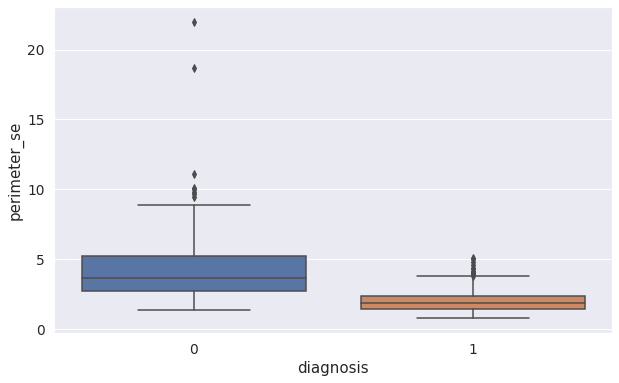

In [118]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='diagnosis', y="perimeter_se")
plt.show()

<AxesSubplot:xlabel='symmetry_worst', ylabel='Count'>

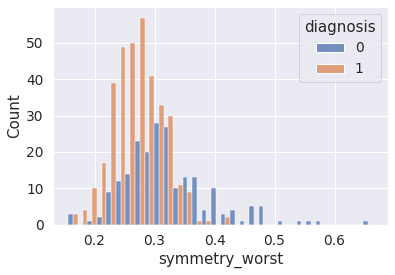

In [119]:
sns.histplot(data=data, x="symmetry_worst", hue="diagnosis", multiple="dodge")

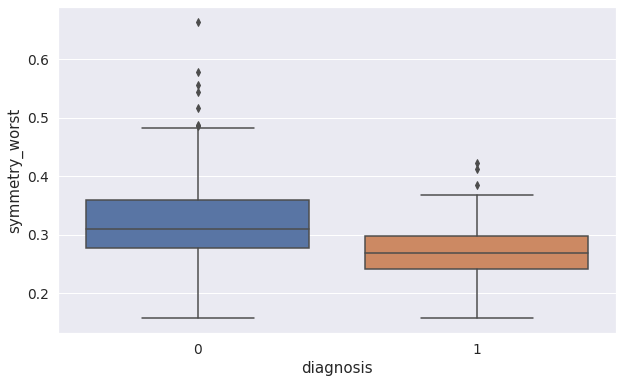

In [120]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='diagnosis', y="symmetry_worst")
plt.show()

In [121]:
# На боксплотах прослеживается разный диагноз для разных значений переменных. 

In [122]:
# Проведем корреляционный анализ, получим 8 наиболее корелирующих признаков
k = 8 
corrmat = data.corr()
cols = corrmat.nlargest(k, 'diagnosis')['diagnosis'].index.tolist()
cols

['diagnosis',
 'smoothness_se',
 'fractal_dimension_mean',
 'texture_se',
 'symmetry_se',
 'fractal_dimension_se',
 'concavity_se',
 'compactness_se']

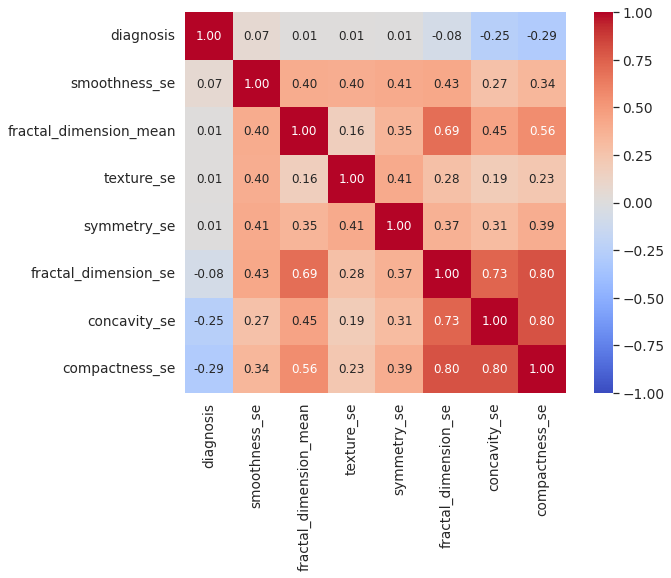

In [123]:
# Построим тепловую карту корреляция
cm = np.corrcoef(data[cols].values.T)
plt.figure(figsize=(10,7))
sns.set(font_scale=1.25)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12},\
                yticklabels=cols, xticklabels=cols, vmin=-1, center=0,\
                    cmap=sns.color_palette('coolwarm',1000))
plt.show()

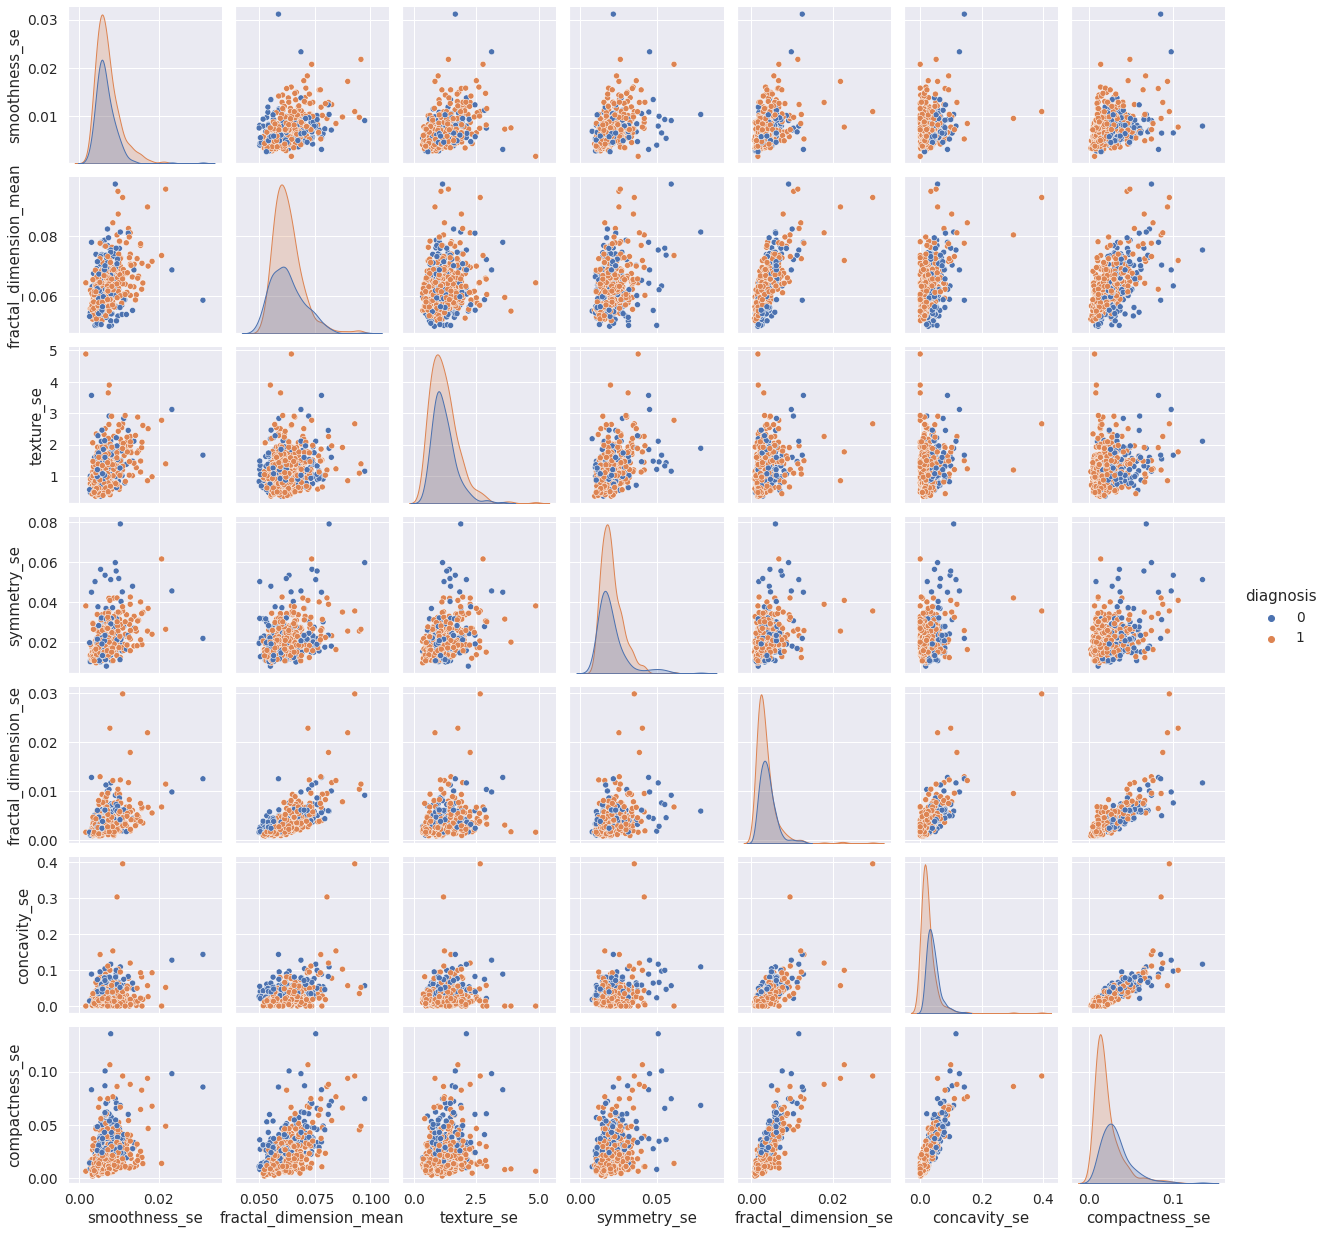

In [124]:
# Построим скатерплоты для этих 8-ми признаков
sns.pairplot(data=data[cols], hue='diagnosis')
plt.show()
# Линейная зависимость не наблюдается 

In [125]:
# Обучение knn
# Приготовим набор для тренировки и тестирования
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['diagnosis'], axis=1), data['diagnosis'], test_size=0.30, random_state=42, stratify=data['diagnosis']
)

In [126]:
# Приведем их к одному масштабу, чтобы не было ошибок из-за сравнения на разных массштабах
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

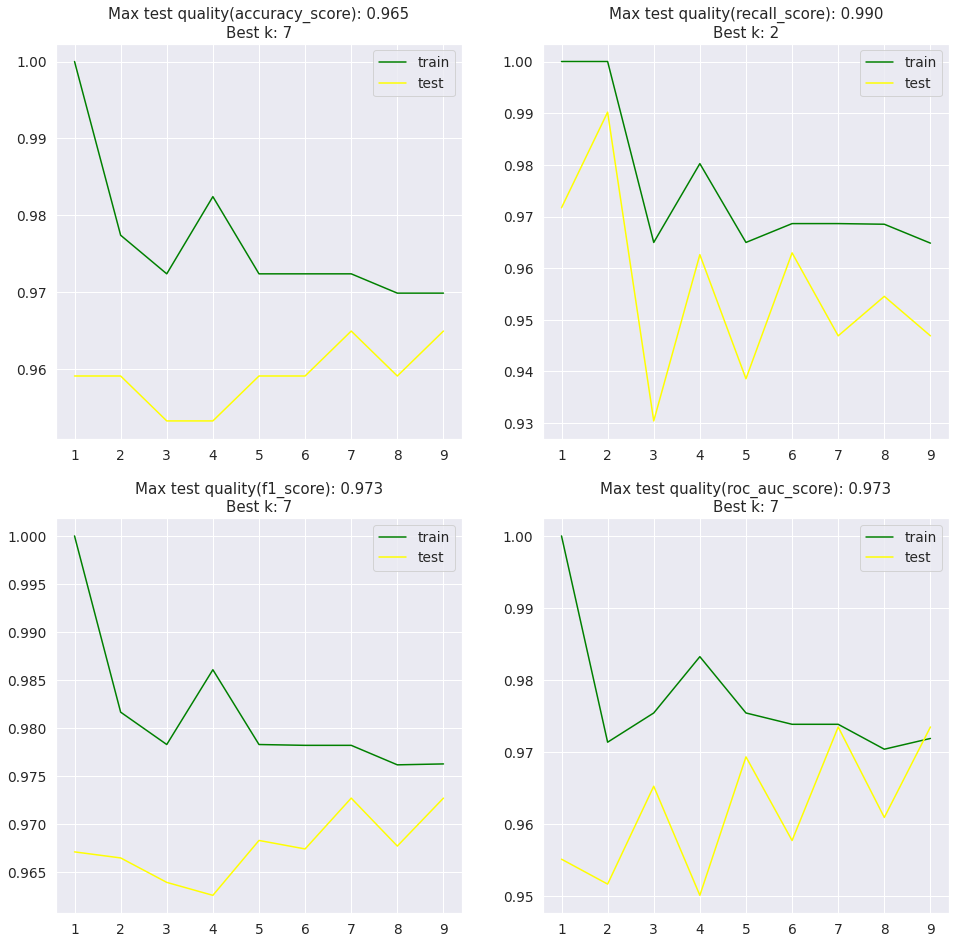

In [127]:
neighbors = range(1, 10)
f1_score_train = []
f1_score_test = []
accuracy_score_train = []
accuracy_score_test = []
recall_score_train = []
recall_score_test = []
roc_auc_score_train = []
roc_auc_score_test = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    f1_score_train.append(f1_score(knn.predict(X_train_scaled), y_train))
    f1_score_test.append(f1_score(knn.predict(X_test_scaled), y_test))
    accuracy_score_train.append(accuracy_score(knn.predict(X_train_scaled), y_train))
    accuracy_score_test.append(accuracy_score(knn.predict(X_test_scaled), y_test))
    recall_score_train.append(recall_score(knn.predict(X_train_scaled), y_train))
    recall_score_test.append(recall_score(knn.predict(X_test_scaled), y_test))
    roc_auc_score_train.append(roc_auc_score(knn.predict(X_train_scaled), y_train))
    roc_auc_score_test.append(roc_auc_score(knn.predict(X_test_scaled), y_test))
fig, axs = plt.subplots(2, 2, figsize=(16, 16))
axs[0,0].set_title("Max test quality(accuracy_score): {:.3f}\nBest k: {}".format(max(accuracy_score_test), np.argmax(accuracy_score_test)+1))
axs[0,0].plot(neighbors, accuracy_score_train, color='green', label='train')
axs[0,0].plot(neighbors, accuracy_score_test, color='yellow', label='test')
axs[0,0].legend()

axs[0,1].set_title("Max test quality(recall_score): {:.3f}\nBest k: {}".format(max(recall_score_test), np.argmax(recall_score_test)+1))
axs[0,1].plot(neighbors, recall_score_train, color='green', label='train')
axs[0,1].plot(neighbors, recall_score_test, color='yellow', label='test')
axs[0,1].legend();  

axs[1,0].set_title("Max test quality(f1_score): {:.3f}\nBest k: {}".format(max(f1_score_test), np.argmax(f1_score_test)+1))
axs[1,0].plot(neighbors, f1_score_train, color='green', label='train')
axs[1,0].plot(neighbors, f1_score_test, color='yellow', label='test')
axs[1,0].legend();  

axs[1,1].set_title("Max test quality(roc_auc_score): {:.3f}\nBest k: {}".format(max(roc_auc_score_test), np.argmax(roc_auc_score_test)+1))
axs[1,1].plot(neighbors, roc_auc_score_train, color='green', label='train')
axs[1,1].plot(neighbors, roc_auc_score_test, color='yellow', label='test')
axs[1,1].legend();  

In [128]:
# f1 и roc_auc показывают наилучшее качество. Все тесты сводятся к налиучшему качеству при количестве соседей - равном 3

In [135]:
# проведем проверку с использованием кросс-валидации
knn = KNeighborsClassifier(n_neighbors=3)
data_scaled=scaler.fit_transform(data)
for s in ["accuracy","recall","f1","roc_auc"]:
    scores = cross_val_score(knn, data_scaled.drop(['diagnosis'], axis=1), data_scaled['diagnosis'], cv=5, scoring=s)
    print("\nuse score "+s)
    print(scores)
    print('mean', scores.mean())
    print('std', scores.std())

AttributeError: 'numpy.ndarray' object has no attribute 'drop'